In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
from scipy import stats
import pickle
%matplotlib inline

In [2]:
data = pd.read_csv("house_dataset.csv")

In [3]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [5]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.401822e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.673622e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

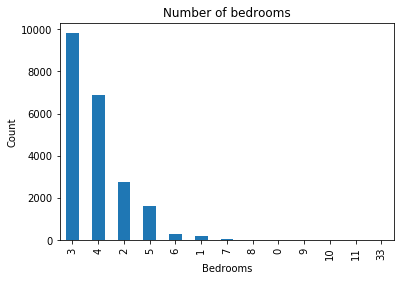

In [6]:
data['bedrooms'].value_counts().plot(kind='bar')
plt.title('Number of bedrooms')
plt.xlabel('Bedrooms')
plt.ylabel('Count')
sns.despine

In [7]:
L = np.random.random(100)
sum(L)



49.84943620956019

In [8]:
np.sum(L)

49.8494362095602

In [9]:
big_array = np.random.rand(1000000)
%timeit sum(big_array)
%timeit np.sum(big_array)

521 ms ± 15.9 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.23 ms ± 12.4 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
print(big_array.min(), big_array.max(), big_array.sum())

6.72902733533931e-09 0.9999997136310689 500254.3774071208


In [11]:
price = np.array(data['price'])

In [12]:
print(price)

[221900. 538000. 180000. ... 402101. 400000. 325000.]


In [13]:
print("Mean Price:       ", price.mean())
print("Standard deviation:", price.std())
print("Minimum Price:    ", price.min())
print("Maximum Price:    ", price.max())

Mean Price:        540182.1587933188
Standard deviation: 367353.73297926004
Minimum Price:     75000.0
Maximum Price:     7700000.0


c:\users\niles\appdata\local\programs\python\python37-32\lib\site-packages\seaborn\axisgrid.py:2262: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<Figure size 720x720 with 0 Axes>

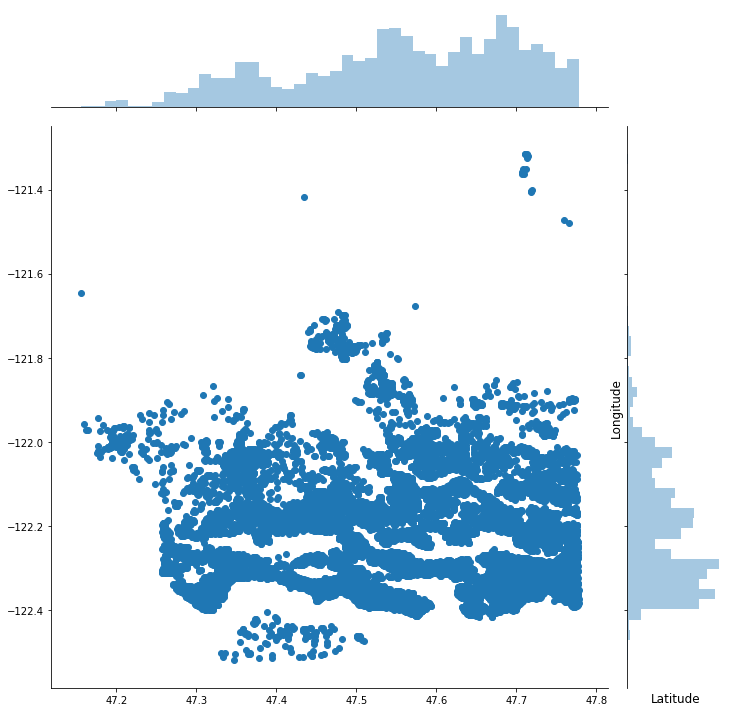

<function seaborn.utils.despine(fig=None, ax=None, top=True, right=True, left=False, bottom=False, offset=None, trim=False)>

In [14]:
plt.figure(figsize=(10,10))
sns.jointplot(x=data.lat.values,y=data.long.values, size=10)
plt.ylabel('Longitude',fontsize=12)
plt.xlabel('Latitude',fontsize=12)
plt.show()
sns.despine

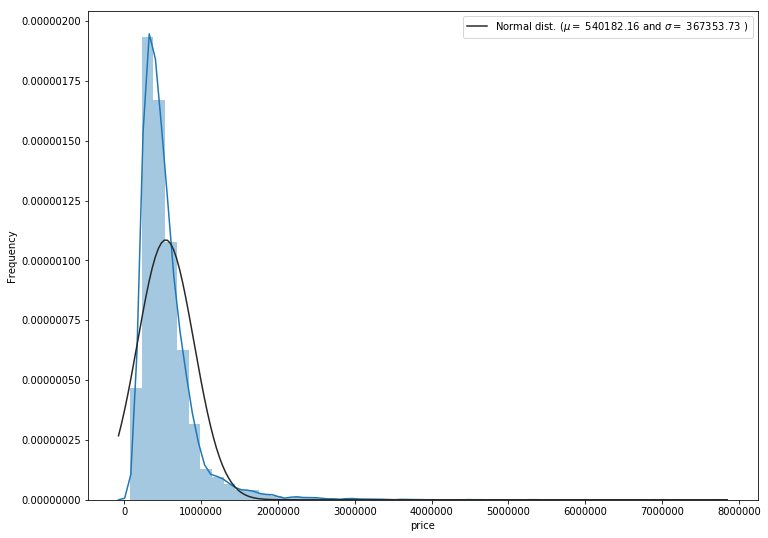

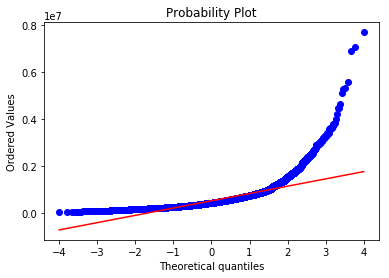

In [15]:
plt.subplots(figsize=(12,9))
sns.distplot(data['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data['price'], plot=plt)
plt.show()

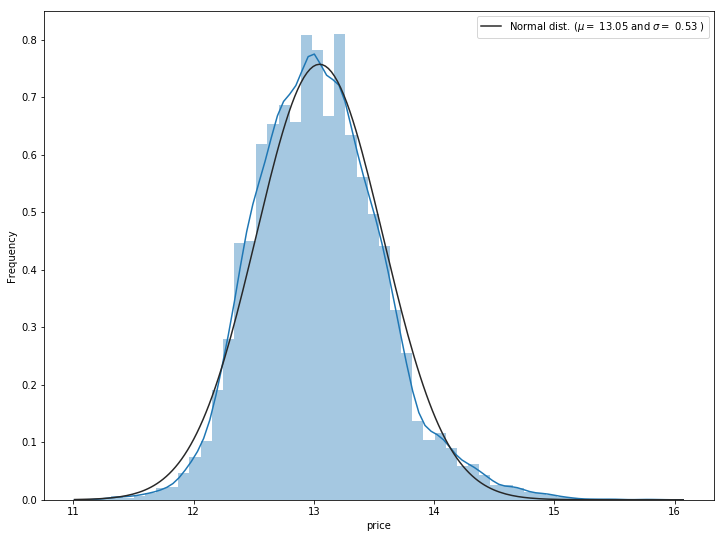

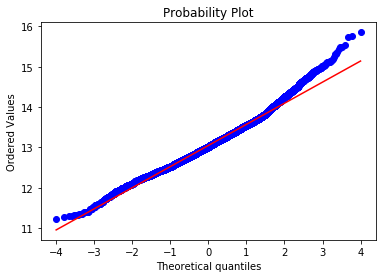

In [16]:
data['price'] = np.log1p(data['price'])

#Check again for more normal distribution

plt.subplots(figsize=(12,9))
sns.distplot(data['price'], fit=stats.norm)

# Get the fitted parameters used by the function

(mu, sigma) = stats.norm.fit(data['price'])

# plot with the distribution

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
plt.ylabel('Frequency')

#Probablity plot

fig = plt.figure()
stats.probplot(data['price'], plot=plt)
plt.show()

Text(0.5, 1.0, 'Price vs Square feet')

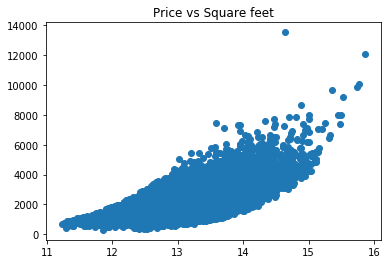

In [17]:
plt.scatter(data.price,data.sqft_living)
plt.title("Price vs Square feet")

Text(0.5, 1.0, 'Price vs Location of the area')

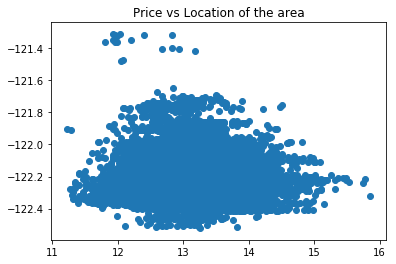

In [18]:
plt.scatter(data.price,data.long)
plt.title("Price vs Location of the area")

Text(0.5, 1.0, 'Latitude vs Price')

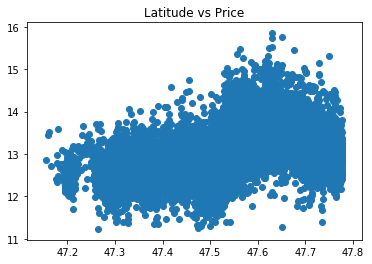

In [19]:
plt.scatter(data.lat,data.price)
plt.title("Latitude vs Price")

Text(0.5, 1.0, 'Longitude vs Price')

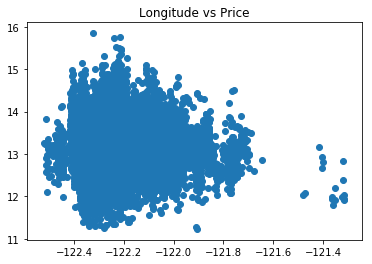

In [20]:
plt.scatter(data.long,data.price)
plt.title("Longitude vs Price")

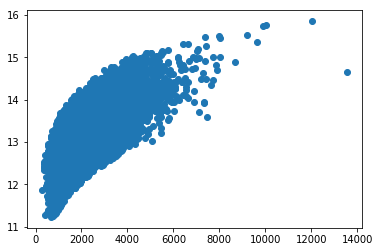

In [21]:
plt.scatter((data['sqft_living']),data['price'])

Text(0.5, 1.0, 'Location Prices as per zipcode')

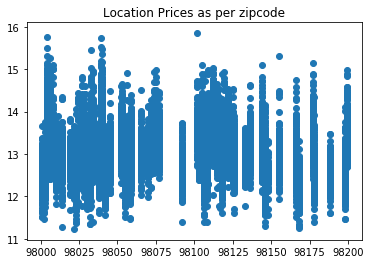

In [22]:
plt.scatter(data.zipcode,data.price)
plt.title("Location Prices as per zipcode")

In [23]:
from sklearn.linear_model import LinearRegression

In [36]:
reg = LinearRegression()

In [39]:
data.keys()

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

In [43]:
labels = data['price']
conv_dates = [1 if values == 2014 else 0 for values in data.date]
data['date'] = conv_dates
train1=data.drop(['id','price','date', 'bathrooms', 'sqft_lot', 'floors', 'waterfront',
                  'view', 'condition', 'grade', 'sqft_above', 'sqft_basement',
                 'yr_built', 'yr_renovated', 'sqft_living15', 'sqft_lot15'],axis=1)


In [44]:
train1.keys()

Index(['bedrooms', 'sqft_living', 'zipcode', 'lat', 'long'], dtype='object')

In [45]:
from sklearn.model_selection import train_test_split

In [46]:
x_train , x_test , y_train , y_test = train_test_split(train1 , labels , test_size = 0.10,random_state=2)

In [47]:
reg.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [48]:
reg.score(x_test,y_test)

0.6665645094639263

In [49]:
filename = 'finalized_model.sav'
file = open(filename, 'wb')

In [50]:
pickle.dump(reg, file)

In [51]:
file.close()

In [52]:
file = open(filename, 'rb')
lr_model = pickle.load(file)
file.close()

In [53]:
lr_model.score(x_test, y_test)

0.6665645094639263

In [59]:
result = lr_model.predict(x_test)

In [61]:
result

array([13.39175442, 13.18350995, 13.06374556, ..., 12.4984339 ,
       12.65198162, 12.93923908])

In [65]:
arr = ['a', 'b', 'c', 'd']
print(np.array(arr).reshape(4,1))

[['a']
 ['b']
 ['c']
 ['d']]


In [68]:
input_args = ['40110', '1000', '2', '37.9346', '-85.6555']
input_args = np.array(input_args).reshape(1,5)
input_args

array([['40110', '1000', '2', '37.9346', '-85.6555']], dtype='<U8')

In [69]:
datainput = pd.DataFrame(input_args, columns = ['zipcode', 'sqft_living', 'bedrooms', 'lat', 'long'])

In [70]:
lr_model.predict(datainput)

array([-1470.85750384])